# 3. SciPy stäkk. NumPy ja pandas moodulid.

Ülesanded:
* [Ülesanne 3.1](#3_1)
* [Ülesanne 3.2](#3_2)

In [2]:
import numpy as np
from numpy import linalg


## NumPy massiivid (numpy array)

[NumPy](https://docs.scipy.org/doc/numpy/user/quickstart.html) mooduli põhiobjekt on array - sama tüüpi objektide (tavaliselt arvud) N-dimensiooniline massiiv. Massiivi tekitamiseks on erinevaid funktsioone:
* np.zeros(shape_tuple) tekitab nullide massiivi
* np.ones(shape_tuple) tekitab ühtede massiivi
* np.array(list) tekitab massiivi etteantud listi (listide list, listide listide list jne.) alusel
* np.arange(alumine, ülemine) tekitab arvujadal põhineva massiivi analoogselt funktsiooniga range()
* np.identity(n) tekitab n korda n ühikmaatriksi
* np.random.rand(dim1, dim2,...) tekitab juhuarvude massiivi

In [18]:
a0 = np.zeros(5, int, order="F") # 5 elementi
a0

array([0, 0, 0, 0, 0])

In [10]:
a1 = np.ones((5, 4)) # 5 rida, 4 veergu
a1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [21]:
p1 = [[1, 2.0], ['c', exit]]
a2 = np.array(p1) # teisenda arvulistide list np massiiviks
a2

array([[1, 2.0],
       ['c',
      dtype=object)

In [160]:
a_jada = np.arange(-10, 10) # arvujada -10 ... 9 np massiivina
a_jada

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

In [217]:
a_rnd = np.random.rand(7, 3) # juhuarvud ühtlase jaotusega vahemikus 0..1, 7 rida 3 veergu
a_rnd

array([[0.01147801, 0.30238137, 0.37382248],
       [0.2264986 , 0.83192292, 0.17939883],
       [0.47770382, 0.505495  , 0.34747411],
       [0.4155414 , 0.88003399, 0.21267611],
       [0.16447057, 0.5870468 , 0.62833424],
       [0.11163   , 0.95447591, 0.69454493],
       [0.36718388, 0.29402302, 0.89456631]])

In [8]:
a_i = np.identity(4)
a_i

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

NumPy massiivi indekseerimine ja lõikumine on üldiselt sama kui kõigil Pythoni jadadel. Erinevuseks on see, et  NumPy lubab mitmemõõtmelise andmestruktuurina mitut komadega eraldatud indeksit või lõiku. NumPy lubab kasutada lõigu asemel ka indeksite listi, mis tagastab ainult nende indeksitega elemendid. Ridade/veergude väljavalimiseks võib kasutada ka tõeväärtuste (True/False) listi/jada/1D-massiivi, mille pikkus vastab maatriksi dimensioonile.

In [218]:
a_rnd[0] # esimene rida

array([0.01147801, 0.30238137, 0.37382248])

In [10]:
a_rnd[0][-1] # esimese rea viimane element

0.0580877262006777

In [11]:
a_rnd[0,-1] # ekvivalentne kuju

0.0580877262006777

In [319]:
a_rnd[:, 1] # Teine veerg. Lõik : enne koma vastab kõigile ridadele.

array([0.30238137, 0.83192292, 0.505495  , 0.88003399, 0.5870468 ,
       0.95447591, 0.29402302])

In [13]:
a_rnd[[0,2]] # Indeksite list. Read üks ja kolm.

array([[0.46851041, 0.35967889, 0.05808773],
       [0.91243216, 0.32804761, 0.77093088]])

In [383]:
a_rnd[[0,2], 1:] # Read üks ja kolm. Veerud teisest kuni lõpuni.

array([[0.30238137, 0.37382248],
       [0.505495  , 0.34747411]])

In [15]:
a_rnd[:, [True, False, True]] # Kõik read, keskmine veerg jääb välja.

array([[0.46851041, 0.05808773],
       [0.53966319, 0.34919815],
       [0.91243216, 0.77093088],
       [0.56401715, 0.45307471],
       [0.56226156, 0.77867496],
       [0.68679729, 0.14872733],
       [0.62224453, 0.37909685]])

Massiivi kuju enniku (*tuple*) tagastab `shape` atribuut, massiivi uuele kujule teisendatud variandi tagastab `reshape(shape_tuple)` meetod (elementide arv peab algses ja tagastatavas massiivis olema võrdne), `transpose()` funktsioon transponeerib massiivi/maatriksi (massiivi `T` atribuut transponeerib samuti).

In [16]:
a_jada.shape

(20,)

In [17]:
a_4_korda_5 = a_jada.reshape((4,5))
print(a_4_korda_5)
print(a_4_korda_5.shape)

[[-10  -9  -8  -7  -6]
 [ -5  -4  -3  -2  -1]
 [  0   1   2   3   4]
 [  5   6   7   8   9]]
(4, 5)


In [18]:
a_t = np.transpose(a_4_korda_5)
a_t

array([[-10,  -5,   0,   5],
       [ -9,  -4,   1,   6],
       [ -8,  -3,   2,   7],
       [ -7,  -2,   3,   8],
       [ -6,  -1,   4,   9]])

In [19]:
a_4_korda_5.T # ekvivalentne kuju

array([[-10,  -5,   0,   5],
       [ -9,  -4,   1,   6],
       [ -8,  -3,   2,   7],
       [ -7,  -2,   3,   8],
       [ -6,  -1,   4,   9]])

Operatsioonid: +, -, *, /, @, >, <, <=, >=, ==, !=, %.

Demonstreerime elementhaaval toimuvaid operatsioone. Maatriksite kujud peavad klappima (*casting*): sama kuju, väiksem maatriks on sama kujuga kui suurema rida või maatriksi asemel on skalaar (arv). 

In [20]:
print("a1\n", a1)
print("a_t\n", a_t)
print("on suurem >:\n", a1 > a_t)
print("võrdub ==:\n", a1 == a_t)
print("summa +:\n", a1 + a_t)
print("ekvivalentne summa arvuga 1:\n", 1.0 + a_t)
print("vahe -:\n", a1 - a_t)
print("korrutis *:\n", a1 * a_t)
print("jagatis /:\n", a1 / a_t)

a1
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
a_t
 [[-10  -5   0   5]
 [ -9  -4   1   6]
 [ -8  -3   2   7]
 [ -7  -2   3   8]
 [ -6  -1   4   9]]
on suurem >:
 [[ True  True  True False]
 [ True  True False False]
 [ True  True False False]
 [ True  True False False]
 [ True  True False False]]
võrdub ==:
 [[False False False False]
 [False False  True False]
 [False False False False]
 [False False False False]
 [False False False False]]
summa +:
 [[-9. -4.  1.  6.]
 [-8. -3.  2.  7.]
 [-7. -2.  3.  8.]
 [-6. -1.  4.  9.]
 [-5.  0.  5. 10.]]
ekvivalentne summa arvuga 1:
 [[-9. -4.  1.  6.]
 [-8. -3.  2.  7.]
 [-7. -2.  3.  8.]
 [-6. -1.  4.  9.]
 [-5.  0.  5. 10.]]
vahe -:
 [[11.  6.  1. -4.]
 [10.  5.  0. -5.]
 [ 9.  4. -1. -6.]
 [ 8.  3. -2. -7.]
 [ 7.  2. -3. -8.]]
korrutis *:
 [[-10.  -5.   0.   5.]
 [ -9.  -4.   1.   6.]
 [ -8.  -3.   2.   7.]
 [ -7.  -2.   3.   8.]
 [ -6.  -1.   4.   9.]]
jagatis /:
 [[-0.1        -0.2                inf  0.2 

E:\ProgramData\Anaconda3_431\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


Maatrikskorrutisele vastab operaator `@` (ka funktsioon `np.dot()`).

In [21]:
a = np.array([[3, 2, -2],
              [1, 0, -1]])
b = np.array([[1, 2, 1, 2],
              [0, 0, 0, 1],
              [-1,2, 3, 0]])
a @ b

array([[ 5,  2, -3,  8],
       [ 2,  0, -2,  2]])

In [22]:
a @ np.identity(3) # Ühikmaatriksiga korrutamine jätab maatriksi samaks

array([[ 3.,  2., -2.],
       [ 1.,  0., -1.]])

Demonstreerime loogiliste operatsioonide kasutamist selleks, et tõeväärtusvektorite (1D massiiv) abil valida välja ridu või veerge.

In [23]:
# Valime välja maatriks a_rnd paarituarvuliste indeksitega read

indeksid = np.arange(len(a_rnd)) # indeksid massiivina
print(indeksid)
mod2 = indeksid % 2 # leiame jäägid jagamisel kahega
print(mod2)
on_paaritu_indeks = mod2 != 0  # Kontrollime jäägi mittevõrdumist nulliga. Tulemuseks on tõeväärtused.
print(on_paaritu_indeks)
print(a_rnd[on_paaritu_indeks]) # Rakendame tõeväärtuseid ridade valimiseks.

[0 1 2 3 4 5 6]
[0 1 0 1 0 1 0]
[False  True False  True False  True False]
[[0.53966319 0.94969688 0.34919815]
 [0.56401715 0.63939874 0.45307471]
 [0.68679729 0.14160403 0.14872733]]


In [24]:
# Sama asi ühe reaga
a_rnd[np.arange(len(a_rnd))% 2 != 0]

array([[0.53966319, 0.94969688, 0.34919815],
       [0.56401715, 0.63939874, 0.45307471],
       [0.68679729, 0.14160403, 0.14872733]])

<a id='3_1'></a>

## Ülesanne 3.1

Defineerida NumPy massiividena järgnevad arvumaatriksid A ja B:

$A = \begin{bmatrix}
0 & -2 \\
1 & -3 \\
3 & -1  
\end{bmatrix}$

$B = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6  
\end{bmatrix}$

a) Leida ja väljastada järgnevad maatriksid:
* $A + B$
* $A - B$
* $5A$
* $C= A B^T$ (maatrikskorrutis transponeeritud maatriksiga B, mitte korrutis elementhaaval)

In [332]:
a = np.array([[0, -2], [1, -3], [3, -1]])
a

array([[ 0, -2],
       [ 1, -3],
       [ 3, -1]])

In [334]:
b = np.array([[1, 2], [3, 4], [5, 6]])
b

array([[1, 2],
       [3, 4],
       [5, 6]])

In [335]:
a + b

array([[1, 0],
       [4, 1],
       [8, 5]])

In [339]:
a - b

array([[-1, -4],
       [-2, -7],
       [-2, -7]])

In [338]:
5 * a

array([[  0, -10],
       [  5, -15],
       [ 15,  -5]])

In [357]:
c = np.dot(a, np.transpose(b))
c

array([[ -4,  -8, -12],
       [ -5,  -9, -13],
       [  1,   5,   9]])

b) Leida ja väljastada maatriks D, mis koosneb maatriksi C eelviimasest ja viimasest veerust. Väljastada  selle maatriksi element $D_{2,0}$ (indeksid on antud Pythoni stiilis).

In [385]:
d = c[:,-2:]
d

array([[ -8, -12],
       [ -9, -13],
       [  5,   9]])

In [386]:
d[2][0]

5

c) Tekitada 3x3 ühikmaatriks I (funktsioon `identity()`). Väljastada see maatriks. Väljastada maatrikskorrutis $ID$ ja kontrollida, et see võrdub maatriksiga D.

In [400]:
i = np.identity(3)
i

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [401]:
np.dot(i, d)

array([[ -8., -12.],
       [ -9., -13.],
       [  5.,   9.]])

d) Tekitada 3x3 ühtedega täidetud maatriks Y (funktsioon `ones()`) ja väljastada see . Väljastada maatrikskorrutsi $IY$ ja elementhaaval sooritatud korrutis `I * Y`.

In [403]:
y = np.ones([3, 3])
y

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [404]:
np.dot(i, y)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [405]:
i * y

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Funktsioonid NumPy massiividel

Massiivi kirjeldamiseks läbi keskmise ja standardhälbe on saadaval järgnevad statistilised funktsioonid: `np.mean(), np.std()`.

In [26]:
np.mean(a_rnd), np.std(a_rnd)

(0.5043340009811448, 0.2355409397598788)

Universaalsed funktsioonid [Ufuncs](https://docs.scipy.org/doc/numpy-1.15.1/reference/ufuncs.html) on funktsioonid, mis rakenduvad kõigile massiivi elementidele ja annavad tulemuseks elementhaaval teisendatud massiivi. Täielikku loetelu ei ole nende suure arvu tõttu mõtet siin tuua.

In [27]:
np.sin(a_rnd)

array([[0.45155772, 0.35197369, 0.05805507],
       [0.51384707, 0.81323915, 0.34214446],
       [0.79099413, 0.32219536, 0.69680323],
       [0.53458546, 0.59671307, 0.43773208],
       [0.53310096, 0.33537934, 0.70233681],
       [0.63406384, 0.14113127, 0.14817964],
       [0.58286047, 0.51144294, 0.37008159]])

In [28]:
# reduce rakendab ufunc operatsiooni üle kõigi reavektorite
np.multiply.reduce(a_rnd)

array([0.03126533, 0.00186288, 0.00031106])

## Maatriksarvutus ja lineaarvõrrandisüsteemid

Näited põhinevad õpikul *Majandusmatemaatika alused. (Aasma, Kallam ja Levin.)*

### Determinantide arvutamine

Arvutada neljandat järku determinant:

$\begin{bmatrix}
2 & -1 & 3 & 4 \\
-1 & 0 & -1 & 2 \\
3 & 1 & -1 & 0 \\ 
1 & 0 & 2 & -1 \\
\end{bmatrix}$

In [29]:
a = np.array([[2, -1, 3, 4],
              [-1, 0, -1, 2], 
              [3, 1, -1, 0], 
              [1, 0, 2, -1]])
linalg.det(a)

17.0

### Võrrandisüsteemide lahendamine

Lahendada võrrandisüsteem:

$\begin{cases} 
2x_{1} - 8x_{2} + 4x_{3} = 16 \\ 
3x_{1} + 3x_{2} + 5x_{3} = 4 \\ 
2x_{1} - 5x_{2} + 9x_{3} = 22 \\ 
\end{cases}$

In [30]:
a = np.array([[2, -8, 4], 
              [3, 3, 5], 
              [2, -5, 9]])
b = np.array([16, 4, 22])
linalg.solve(a, b)

array([-0.66666667, -1.20512821,  1.92307692])



Lahendada võrrandisüsteem:

$\begin{cases} 
2x_{1} - 8x_{2} + 4x_{3} = 16 \\ 
3x_{2} + 5x_{3} = 4 \\ 
2x_{1} - 5x_{2} + 9x_{3} = 22 \\ 
\end{cases}$



In [31]:
a = np.array([[2, -8, 4], 
              [0, 3, 5], 
              [2, -5, 9]])
b = np.array([16, 4, 22])
try: 
    print(linalg.solve(a, b))
except linalg.LinAlgError:
    print("Singulaarmatriksil põhinev süsteem ei lahendu!")

Singulaarmatriksil põhinev süsteem ei lahendu!


In [32]:
linalg.det(a)  # Kontrollime maatriksi a singulaarsust. Kas determinant on null?

0.0

### Pöördmaatriks

Leida maatriksi *A* pöördmaatriks

$A=\begin{bmatrix}
1 & -2 & 2 \\
1 & -3 & 2 \\
1 & -5 & 5 
\end{bmatrix}$

In [33]:
a = np.array([[1, -2, 2], 
              [1, -3, 2], 
              [1, -5, 5]])
a_inv = linalg.inv(a)
np.round(a_inv, 3)

array([[ 1.667,  0.   , -0.667],
       [ 1.   , -1.   , -0.   ],
       [ 0.667, -1.   ,  0.333]])

In [34]:
np.round(a @ a_inv) # Kas maatriksi korrutamisel oma pöördmaatriksiga saame ühikmaatriksi?

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Maatrikskorrutise kasutamine

Kirjeldagu järgmine 4x3 maatriks toormaterjali vajadust 4 toote ja 3 toormaterjali jaoks.

In [35]:
a = np.array([[3, 7, 2],
              [4, 1, 5],
              [2, 8, 4],
              [6, 9, 2]])

Kirjeldame ühiku hindasid ja transpordikulusid kõigile toormaterjalidele 3x2 maatriksina.

In [36]:
c = np.array([[3, 8, 4],
              [3, 2, 5]])

Nüüd leiame kõigi nelja toote kogukulud toormaterjalile ja transpordile kasutades maatrikskorrutist (@ operaator):

In [37]:
a @ c.T

array([[73, 33],
       [40, 39],
       [86, 42],
       [98, 46]])

## Pandas andmeraamistik (Dataframe)

Mooduli [pandas](https://pandas.pydata.org/pandas-docs/version/0.23.4/10min.html) Dataframe (andmeraamistik) andmestruktuur esitab tüüpiliselt 2-mõõtmelist andmetabelit, millel võrreldes NumPy massiividega on juures sisulised rea- ja veerunimed, lisamehhanismid lõikumiseks ja valikuks, toetus andmete lugemiseks failidest ja andmebaasist, SQL-laadne join ja groupby funktsionaalsus, tugi puuduvate väärtuste haldamiseks, statistiliseks kirjeldamiseks ja visualiseerimiseks jne. Üks dataframe veerg vastab Series (andmerea) objektile, mis on reaindekseid (võivad olla kasutaja defineeritud) omav ühemõõtmeline andmestruktuur. Dataframe on vaadeldav samade indeksitega Series objektide sõnastikuna.

In [38]:
import pandas as pd

In [39]:
iris_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                      header=None, 
                      names=["sepal_l", "sepal_w", "petal_l", "petal_w", "species"])
iris_df

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Kui soovime kasutada mingit olemasolevat veergu indeksina, siis saame kasutada `read_csv()`võtmesõna argumenti `index_col=veeru_indeks`.

In [40]:
iris_df.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
print(iris_df.columns)
print(iris_df.head())
print(iris_df.tail())


Index(['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'species'], dtype='object')
   sepal_l  sepal_w  petal_l  petal_w      species
0      5.1      3.5      1.4      0.2  Iris-setosa
1      4.9      3.0      1.4      0.2  Iris-setosa
2      4.7      3.2      1.3      0.2  Iris-setosa
3      4.6      3.1      1.5      0.2  Iris-setosa
4      5.0      3.6      1.4      0.2  Iris-setosa
     sepal_l  sepal_w  petal_l  petal_w         species
145      6.7      3.0      5.2      2.3  Iris-virginica
146      6.3      2.5      5.0      1.9  Iris-virginica
147      6.5      3.0      5.2      2.0  Iris-virginica
148      6.2      3.4      5.4      2.3  Iris-virginica
149      5.9      3.0      5.1      1.8  Iris-virginica


Ligipääs elementidele on võimalik:
* Läbi veerunimede, nagu sõnastiku võtmed `df["veerg"]` (ka `df.veerg`)
* Läbi reaindeksite on võimalik leida lõike `df[alumine: ülemine]`
* Läbi atribuudi `loc`, mis võimaldab valida ja lõigata ridu ja veerge läbi veerunimede ja reanimede
* Läbi atribuudi `iloc`, mis võimaldab ligipääsu ridadele ja veergudele läbi täisarvuliste indeksite

In [42]:
iris_df.sepal_l.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_l, dtype: float64

In [43]:
iris_df[80:100]

,sepal_l,sepal_w,petal_l,petal_w,species
80,5.5,2.4,3.8,1.1,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
83,6.0,2.7,5.1,1.6,Iris-versicolor
84,5.4,3.0,4.5,1.5,Iris-versicolor
85,6.0,3.4,4.5,1.6,Iris-versicolor
86,6.7,3.1,4.7,1.5,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor
88,5.6,3.0,4.1,1.3,Iris-versicolor
89,5.5,2.5,4.0,1.3,Iris-versicolor


In [44]:
iris_df.loc[140:,:"petal_l"]

,sepal_l,sepal_w,petal_l
140,6.7,3.1,5.6
141,6.9,3.1,5.1
142,5.8,2.7,5.1
143,6.8,3.2,5.9
144,6.7,3.3,5.7
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4
149,5.9,3.0,5.1


In [45]:
iris_df.iloc[-20:-10,:-1]

,sepal_l,sepal_w,petal_l,petal_w
130,7.4,2.8,6.1,1.9
131,7.9,3.8,6.4,2.0
132,6.4,2.8,5.6,2.2
133,6.3,2.8,5.1,1.5
134,6.1,2.6,5.6,1.4
135,7.7,3.0,6.1,2.3
136,6.3,3.4,5.6,2.4
137,6.4,3.1,5.5,1.8
138,6.0,3.0,4.8,1.8
139,6.9,3.1,5.4,2.1


Veerge ja ridu on võimalik ette anda veerunimede loeteluna (list, tuple)

In [46]:
iris_df.loc[:10, ["sepal_l", "species"]]

,sepal_l,species
0,5.1,Iris-setosa
1,4.9,Iris-setosa
2,4.7,Iris-setosa
3,4.6,Iris-setosa
4,5.0,Iris-setosa
5,5.4,Iris-setosa
6,4.6,Iris-setosa
7,5.0,Iris-setosa
8,4.4,Iris-setosa
9,4.9,Iris-setosa


Andmetele vastava NumPy massiivi tagastab atribuut `values`.

In [47]:
iris_df[-20:].values

array([[7.4, 2.8, 6.1, 1.9, 'Iris-virginica'],
       [7.9, 3.8, 6.4, 2.0, 'Iris-virginica'],
       [6.4, 2.8, 5.6, 2.2, 'Iris-virginica'],
       [6.3, 2.8, 5.1, 1.5, 'Iris-virginica'],
       [6.1, 2.6, 5.6, 1.4, 'Iris-virginica'],
       [7.7, 3.0, 6.1, 2.3, 'Iris-virginica'],
       [6.3, 3.4, 5.6, 2.4, 'Iris-virginica'],
       [6.4, 3.1, 5.5, 1.8, 'Iris-virginica'],
       [6.0, 3.0, 4.8, 1.8, 'Iris-virginica'],
       [6.9, 3.1, 5.4, 2.1, 'Iris-virginica'],
       [6.7, 3.1, 5.6, 2.4, 'Iris-virginica'],
       [6.9, 3.1, 5.1, 2.3, 'Iris-virginica'],
       [5.8, 2.7, 5.1, 1.9, 'Iris-virginica'],
       [6.8, 3.2, 5.9, 2.3, 'Iris-virginica'],
       [6.7, 3.3, 5.7, 2.5, 'Iris-virginica'],
       [6.7, 3.0, 5.2, 2.3, 'Iris-virginica'],
       [6.3, 2.5, 5.0, 1.9, 'Iris-virginica'],
       [6.5, 3.0, 5.2, 2.0, 'Iris-virginica'],
       [6.2, 3.4, 5.4, 2.3, 'Iris-virginica'],
       [5.9, 3.0, 5.1, 1.8, 'Iris-virginica']], dtype=object)

Dataframe objektile saab rakendada ka tõeväärtusfiltreid: tõeväärtuseid omavaid veeruvektoreid. Nende veeruvektorite kombineerimiseks saab kasutada loogilisi operaatoreid `| (or), & (and)`. 

In [48]:
(iris_df.sepal_l > 5.0).head()

0     True
1    False
2    False
3    False
4    False
Name: sepal_l, dtype: bool

In [49]:
suured = (iris_df.sepal_l > 5.0) | (iris_df.petal_l > 1.4)
suured.head()

0     True
1    False
2    False
3     True
4    False
dtype: bool

In [50]:
suured_df = iris_df.loc[suured]
suured_df.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,134.000000,134.000000,134.000000,134.000000
mean,5.981343,3.042537,4.050746,1.316418
std,0.762482,0.444917,1.637151,0.721860
min,4.600000,2.000000,1.200000,0.100000
25%,5.400000,2.800000,2.175000,0.700000
50%,5.950000,3.000000,4.500000,1.400000
75%,6.500000,3.300000,5.175000,1.875000
max,7.900000,4.400000,6.900000,2.500000


Andmeraamistike kombineerimiseks on kasutusel `append()` ja `concat()`meetodid, ridade või veergude eemaldamiseks `drop()` meetod, puuduvate väärtuste eemaldamiseks `dropna()` meetod.

In [51]:
setosa_df = iris_df.loc[iris_df.species == "Iris-setosa"]
setosa_df.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [52]:
combo_df = suured_df.append(setosa_df)
combo_df.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,184.000000,184.000000,184.000000,184.000000
mean,5.716304,3.144565,3.347826,1.025000
std,0.803174,0.459119,1.813126,0.781427
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.200000
50%,5.600000,3.100000,3.850000,1.100000
75%,6.300000,3.400000,4.925000,1.725000
max,7.900000,4.400000,6.900000,2.500000


Andmete visualiseerimist pakub `plot()`meetod.

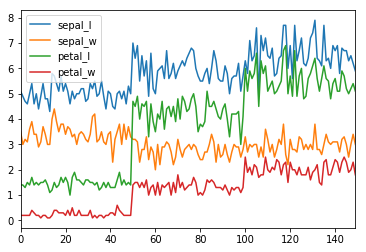

In [53]:
%matplotlib inline

iris_df.plot()

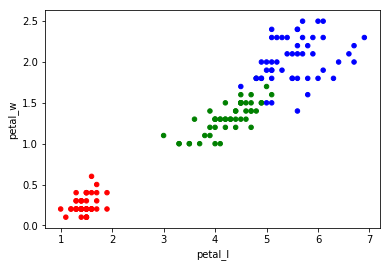

In [54]:
colordict = {"Iris-setosa": "red", "Iris-versicolor": "green", "Iris-virginica": "blue"}
iris_df.plot.scatter(x="petal_l", y="petal_w", c=[colordict[s] for s in iris_df.species])

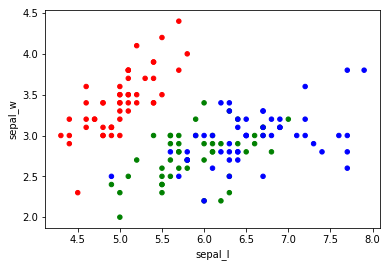

In [55]:
iris_df.plot.scatter(x="sepal_l", y="sepal_w", c=[colordict[s] for s in iris_df.species])

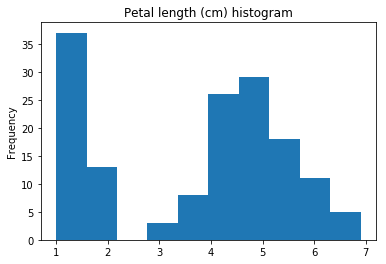

In [56]:
iris_df.petal_l.plot.hist(title="Petal length (cm) histogram")

<a id='3_2'></a>

## Ülesanne 3.2



a) Tutvuge loomaaia andmestikuga aadressil https://archive.ics.uci.edu/ml/datasets/Zoo. 
Lugege kataloogist (Data Folder) https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/ sisse andmestik [Zoo.data](https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data) ja tekitage pandas Dataframe kasutades atribuutide nimesid, mis on kirjeldatud failis [Zoo.names](https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.names). Määrake esimene veerg indeksiveeruks kasutades võtmesõna argumenti `read_csv(...,index_col=0,...)`. Kuvage selle andmestiku päis (meetod `head()`) ja kirjeldus (meetod `describe()`).

In [414]:
import pandas as pd

animals_df = pd.read_csv("Zoo.data", index_col=0, names=["animal name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed", "backbone", "breathes", "venomous", "fins", "legs", "tail" ,"domestic", "catsize", "type"])
animals_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [415]:
animals_df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [416]:
animals_df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


b) Kuvage järgmised alamraamistikud:
* Ainult loomad vahemikus `"bear"`kuni `"catfish"` (tabeli järjestuses)
* Nagu eelmine ja lisaks ainult atribuudid `"predator"`, `"domestic"` ja `"type"`
* Kõik loomad, kellel `legs < 4` ja `backbone == 1` (kasutada valikut loogiliste tingimustega genereeritud tõeväärtusvektorite abil, mitte for-tsükleid)

In [437]:
animals_df["bear":"catfish"]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,,,,,,,,,,,,,,,,,
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4


In [443]:
animals_df.loc["bear":"catfish", ["predator", "domestic", "type"]]

,predator,domestic,type
animal name,,,
bear,1,0,1
boar,1,0,1
buffalo,0,0,1
calf,0,1,1
carp,0,1,4
catfish,1,0,4


In [454]:
animals_df.loc[(animals_df.legs < 4) & (animals_df.backbone == 1)]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,,,,,,,,,,,,,,,,,
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
chub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
crow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
dogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1
dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2


c) Kuvage histogramm (`plot.hist())` meetod) jalgade arvule (veerg `legs`).

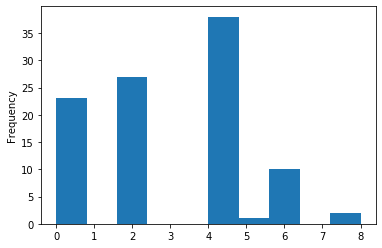

In [452]:
animals_df.legs.plot.hist()